# SUMMARY
## This notebook contains:
* Import and EDA on the edited Census dataset
* Import of the Hazel Crest dataset from  https://apps.cnt.org/lsl/hazel_crest/ containing predictions on lead pipes within the community
* Merge of the above datasets into a new one to be used for modeling

# 1.  Imports and Data


## 1.1 Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

## 1.2 Importing the data set that was crated in the 'ale-census-revised' notebook

In [2]:
census = pd.read_csv('./Data/cookcensus2.csv')
census.columns = census.columns.str.replace(' ', '_')
census.columns = census.columns.str.lower()
census.head()

,unnamed:_0,pin,property_class,neighborhood_code,town_code,type_of_residence,building_square_feet,prior_tax_year_market_value_estimate_(land),prior_tax_year_market_value_estimate_(building),longitude,latitude,census_tract,property_address,age,neighborhood_code.1
0,0,28251090540000,241,260,13,NaN,NaN,4000.0,0.0,-87.693978,41.580357,825503.0,16955 KEDZIE AVE,10,260
1,1,28251170211022,299,260,13,NaN,NaN,3470.0,75810.0,-87.690037,41.579600,825503.0,17008 NOVAK DR,40,260
2,2,28252040400000,241,120,13,NaN,NaN,2040.0,0.0,-87.677251,41.581219,825503.0,2432 170TH ST,10,120
3,3,28251170211020,299,260,13,NaN,NaN,2990.0,43750.0,-87.690037,41.579600,825503.0,17008 NOVAK DR,40,260
4,4,28251170211015,299,260,13,NaN,NaN,2780.0,48050.0,-87.690037,41.579600,825503.0,17008 NOVAK DR,40,260


In [3]:
census.shape

(9714, 15)

In [4]:
census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9714 entries, 0 to 9713
Data columns (total 15 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   unnamed:_0                                       9714 non-null   int64  
 1   pin                                              9714 non-null   int64  
 2   property_class                                   9714 non-null   int64  
 3   neighborhood_code                                9714 non-null   int64  
 4   town_code                                        9714 non-null   int64  
 5   type_of_residence                                7906 non-null   float64
 6   building_square_feet                             7906 non-null   float64
 7   prior_tax_year_market_value_estimate_(land)      9714 non-null   float64
 8   prior_tax_year_market_value_estimate_(building)  9714 non-null   float64
 9   longitude                     

## 1.3 EDA
### Preparing the census daset for merging with the dataset created by others containing the probability of having lead pipes in the Hazel Crest community.   

In [5]:
# Create year built. The code below works fine.  I had to hard code 2022 to replicate my work done in 2022.  
# This book was edited in 2023 and I don't want to be able compare this with the work done in 2022.

#census['current_year'] = datetime.datetime.now().year

census['current_year'] = 2022
census['year_built'] = census['current_year'] - census['age']
census['year_built'], census.shape

(0       2012
 1       1982
 2       2012
 3       1982
 4       1982
         ... 
 9709    2002
 9710    2003
 9711    2002
 9712    2002
 9713    2002
 Name: year_built, Length: 9714, dtype: int64,
 (9714, 17))

In [6]:
census.head()

,unnamed:_0,pin,property_class,neighborhood_code,town_code,type_of_residence,building_square_feet,prior_tax_year_market_value_estimate_(land),prior_tax_year_market_value_estimate_(building),longitude,latitude,census_tract,property_address,age,neighborhood_code.1,current_year,year_built
0,0,28251090540000,241,260,13,NaN,NaN,4000.0,0.0,-87.693978,41.580357,825503.0,16955 KEDZIE AVE,10,260,2022,2012
1,1,28251170211022,299,260,13,NaN,NaN,3470.0,75810.0,-87.690037,41.579600,825503.0,17008 NOVAK DR,40,260,2022,1982
2,2,28252040400000,241,120,13,NaN,NaN,2040.0,0.0,-87.677251,41.581219,825503.0,2432 170TH ST,10,120,2022,2012
3,3,28251170211020,299,260,13,NaN,NaN,2990.0,43750.0,-87.690037,41.579600,825503.0,17008 NOVAK DR,40,260,2022,1982
4,4,28251170211015,299,260,13,NaN,NaN,2780.0,48050.0,-87.690037,41.579600,825503.0,17008 NOVAK DR,40,260,2022,1982


In [7]:
# Checking for missing values
census.isna().sum()

unnamed:_0                                            0
pin                                                   0
property_class                                        0
neighborhood_code                                     0
town_code                                             0
type_of_residence                                  1808
building_square_feet                               1808
prior_tax_year_market_value_estimate_(land)           0
prior_tax_year_market_value_estimate_(building)       0
longitude                                             0
latitude                                              0
census_tract                                          0
property_address                                      0
age                                                   0
neighborhood_code.1                                   0
current_year                                          0
year_built                                            0
dtype: int64

In [8]:
#Removing the last 4 zeros of the pin.  I will need the new format later to match the pin from the County dataset.

census['pin10'] = (census['pin']/10000).astype(np.int64)

In [9]:
census.head()

,unnamed:_0,pin,property_class,neighborhood_code,town_code,type_of_residence,building_square_feet,prior_tax_year_market_value_estimate_(land),prior_tax_year_market_value_estimate_(building),longitude,latitude,census_tract,property_address,age,neighborhood_code.1,current_year,year_built,pin10
0,0,28251090540000,241,260,13,NaN,NaN,4000.0,0.0,-87.693978,41.580357,825503.0,16955 KEDZIE AVE,10,260,2022,2012,2825109054
1,1,28251170211022,299,260,13,NaN,NaN,3470.0,75810.0,-87.690037,41.579600,825503.0,17008 NOVAK DR,40,260,2022,1982,2825117021
2,2,28252040400000,241,120,13,NaN,NaN,2040.0,0.0,-87.677251,41.581219,825503.0,2432 170TH ST,10,120,2022,2012,2825204040
3,3,28251170211020,299,260,13,NaN,NaN,2990.0,43750.0,-87.690037,41.579600,825503.0,17008 NOVAK DR,40,260,2022,1982,2825117021
4,4,28251170211015,299,260,13,NaN,NaN,2780.0,48050.0,-87.690037,41.579600,825503.0,17008 NOVAK DR,40,260,2022,1982,2825117021


In [12]:
census['census_tract'].value_counts()

829902.0    2786
825503.0    2703
825501.0    1696
827700.0    1438
825504.0    1091
Name: census_tract, dtype: int64

### Importing the dataset that includes the probablity of having lead in the pipes.  Predictions done by others
Dataset from:  https://apps.cnt.org/lsl/hazel_crest/ 

In [42]:
# Importing the dataset from the County.  It contains data on lead that we will use later for modeling.
# In the previous notebook the filename was parcels_1.csv.  I have to check the one I have is the same.

haz = pd.read_csv('./Data/parcels_3.csv')
haz.head()

,gid,pin10,property_address,age,zoning,est_year_construction,blkgrp,pct_minority,median_age,pct_single_partent_families,...,hyd_year_stamped,hyd_removed,hyd_dist_feet,hyd_id,g_label,prob_g_lsl,prob,why_lead,why_not_lead,sample_count_1
0,594206,2930111009,16853 CRANE AVE,59,R2,1960,1.703180e+11,80.064309,72,57.913669,...,2012,0,100.493319,03-102H,0.310206,Assumed Lead,IEPAList,NotAssumed,10,2.0
1,594501,2930125045,2305 W 170TH ST,61,R2,1958,1.703180e+11,80.064309,72,57.913669,...,2012,0,173.058995,03-114H,0.396199,Assumed Lead,IEPAList,NotAssumed,4,2.0
2,710583,2825319003,3105 LONGFELLOW AVE,60,R1,1959,1.703180e+11,98.171846,27,49.226006,...,1996,0,187.426221,08-055H,0.405210,Assumed Lead,IEPAList,NotAssumed,10,2.0
3,588334,2930115006,16833 SHEA AVE,52,R2,1967,1.703180e+11,93.566176,58,65.337423,...,1988,0,93.477659,02-066H,0.435751,Assumed Lead,IEPAList,NotAssumed,10,2.0
4,703938,2825321029,3017 LONGFELLOW AVE,57,R1,1962,1.703180e+11,98.171846,27,49.226006,...,1928,0,151.447402,08-044H,0.514053,Assumed Lead,"IEPAList,LeadTest",NotAssumed,6,2.0


In [43]:
haz.shape

(3755, 39)

In [44]:
haz.dtypes

gid                                   int64
pin10                                 int64
property_address                     object
age                                   int64
zoning                               object
est_year_construction                 int64
blkgrp                              float64
pct_minority                        float64
median_age                            int64
pct_single_partent_families         float64
pct_non_english_speakers              int64
median_hh_income                      int64
gr_api                                int64
pct_college_edu                     float64
pct_unemployment                    float64
pct_hh_below_poverty                float64
pct_hh_with_children                float64
median_hh_value                       int64
smoc_api                            float64
pct_renter_du                       float64
pct_vacant_du                       float64
service_line_survey                   int64
estimated_land_value            

### Creating a new dataset with the columns that we believe containes the data useful for the models

In [45]:
# These are the column I will keep

haz2 = haz[['pin10', 'est_year_construction', 'pct_minority', 'pct_single_partent_families', 'pct_non_english_speakers',
          'median_hh_income', 'pct_hh_below_poverty', 'pct_hh_with_children', 'resident_type',
          'hyd_year_stamped', 'g_label', 'prob_g_lsl']]
haz2.head()

,pin10,est_year_construction,pct_minority,pct_single_partent_families,pct_non_english_speakers,median_hh_income,pct_hh_below_poverty,pct_hh_with_children,resident_type,hyd_year_stamped,g_label,prob_g_lsl
0,2930111009,1960,80.064309,57.913669,0,44107,20.967742,43.884892,two-story,2012,0.310206,Assumed Lead
1,2930125045,1958,80.064309,57.913669,0,44107,20.967742,43.884892,1-plus-story,2012,0.396199,Assumed Lead
2,2825319003,1959,98.171846,49.226006,0,49239,17.184644,42.105263,split-level,1996,0.405210,Assumed Lead
3,2930115006,1967,93.566176,65.337423,0,35789,7.720588,45.398773,two-story,1988,0.435751,Assumed Lead
4,2825321029,1962,98.171846,49.226006,0,49239,17.184644,42.105263,one-story,1928,0.514053,Assumed Lead


In [46]:
haz2.dtypes

pin10                            int64
est_year_construction            int64
pct_minority                   float64
pct_single_partent_families    float64
pct_non_english_speakers         int64
median_hh_income                 int64
pct_hh_below_poverty           float64
pct_hh_with_children           float64
resident_type                   object
hyd_year_stamped                 int64
g_label                        float64
prob_g_lsl                      object
dtype: object

### Joining the census dataset with the dataset created by others containing the lead predictions

In [47]:
# Inner join to have Census Data with County dataset on lead

haz_census = pd.merge(haz2, census, left_on='pin10', right_on='pin10', how='inner')
haz_census.head()

,pin10,est_year_construction,pct_minority,pct_single_partent_families,pct_non_english_speakers,median_hh_income,pct_hh_below_poverty,pct_hh_with_children,resident_type,hyd_year_stamped,...,prior_tax_year_market_value_estimate_(land),prior_tax_year_market_value_estimate_(building),longitude,latitude,census_tract,property_address,age,neighborhood_code.1,current_year,year_built
0,2930111009,1960,80.064309,57.913669,0,44107,20.967742,43.884892,two-story,2012,...,13310.0,118330.0,-87.671160,41.583383,827700.0,16853 CRANE AVE,62,130,2022,1960
1,2930125045,1958,80.064309,57.913669,0,44107,20.967742,43.884892,1-plus-story,2012,...,15010.0,34560.0,-87.673116,41.580632,827700.0,2305 W 170TH ST,64,130,2022,1958
2,2825319003,1959,98.171846,49.226006,0,49239,17.184644,42.105263,split-level,1996,...,21130.0,78440.0,-87.691318,41.573429,825503.0,3105 LONGFELLOW AVE,63,260,2022,1959
3,2930115006,1967,93.566176,65.337423,0,35789,7.720588,45.398773,two-story,1988,...,12430.0,76210.0,-87.666394,41.583720,827700.0,16833 SHEA AVE,55,130,2022,1967
4,2825321029,1962,98.171846,49.226006,0,49239,17.184644,42.105263,one-story,1928,...,35360.0,73160.0,-87.690178,41.574146,825503.0,3017 LONGFELLOW AVE,60,260,2022,1962


In [48]:
# study to figure out how to trim the orginal census dataset.  Remove when done
haz_census.shape

(3757, 29)

In [49]:
# study to figure out how to trim the orginal census dataset.  Remove when done
haz_census['census_tract'].value_counts()

825503.0    1190
825501.0     999
827700.0     749
829902.0     488
825504.0     331
Name: census_tract, dtype: int64

In [50]:
haz_census[['pin10', 'pin']]

,pin10,pin
0,2930111009,29301110090000
1,2930125045,29301250450000
2,2825319003,28253190030000
3,2930115006,29301150060000
4,2825321029,28253210290000
...,...,...
3752,3102204178,31022041780000
3753,3102204078,31022040780000
3754,2836319013,28363190130000
3755,2836318007,28363180070000


In [51]:
# Dropping unwanted columns

haz_census.drop(columns=['pin'], inplace=True)
haz_census.drop(columns=['current_year'], inplace=True)
haz_census.drop(columns=['year_built'], inplace=True)
haz_census.head(2)

,pin10,est_year_construction,pct_minority,pct_single_partent_families,pct_non_english_speakers,median_hh_income,pct_hh_below_poverty,pct_hh_with_children,resident_type,hyd_year_stamped,...,type_of_residence,building_square_feet,prior_tax_year_market_value_estimate_(land),prior_tax_year_market_value_estimate_(building),longitude,latitude,census_tract,property_address,age,neighborhood_code.1
0,2930111009,1960,80.064309,57.913669,0,44107,20.967742,43.884892,two-story,2012,...,2.0,2063.0,13310.0,118330.0,-87.671160,41.583383,827700.0,16853 CRANE AVE,62,130
1,2930125045,1958,80.064309,57.913669,0,44107,20.967742,43.884892,1-plus-story,2012,...,5.0,768.0,15010.0,34560.0,-87.673116,41.580632,827700.0,2305 W 170TH ST,64,130


### Exporting the dataset that will be used for modeling

In [52]:
# Exporting the dataset as file for future uses

haz_census.to_csv('./Data/haz_census3.csv')

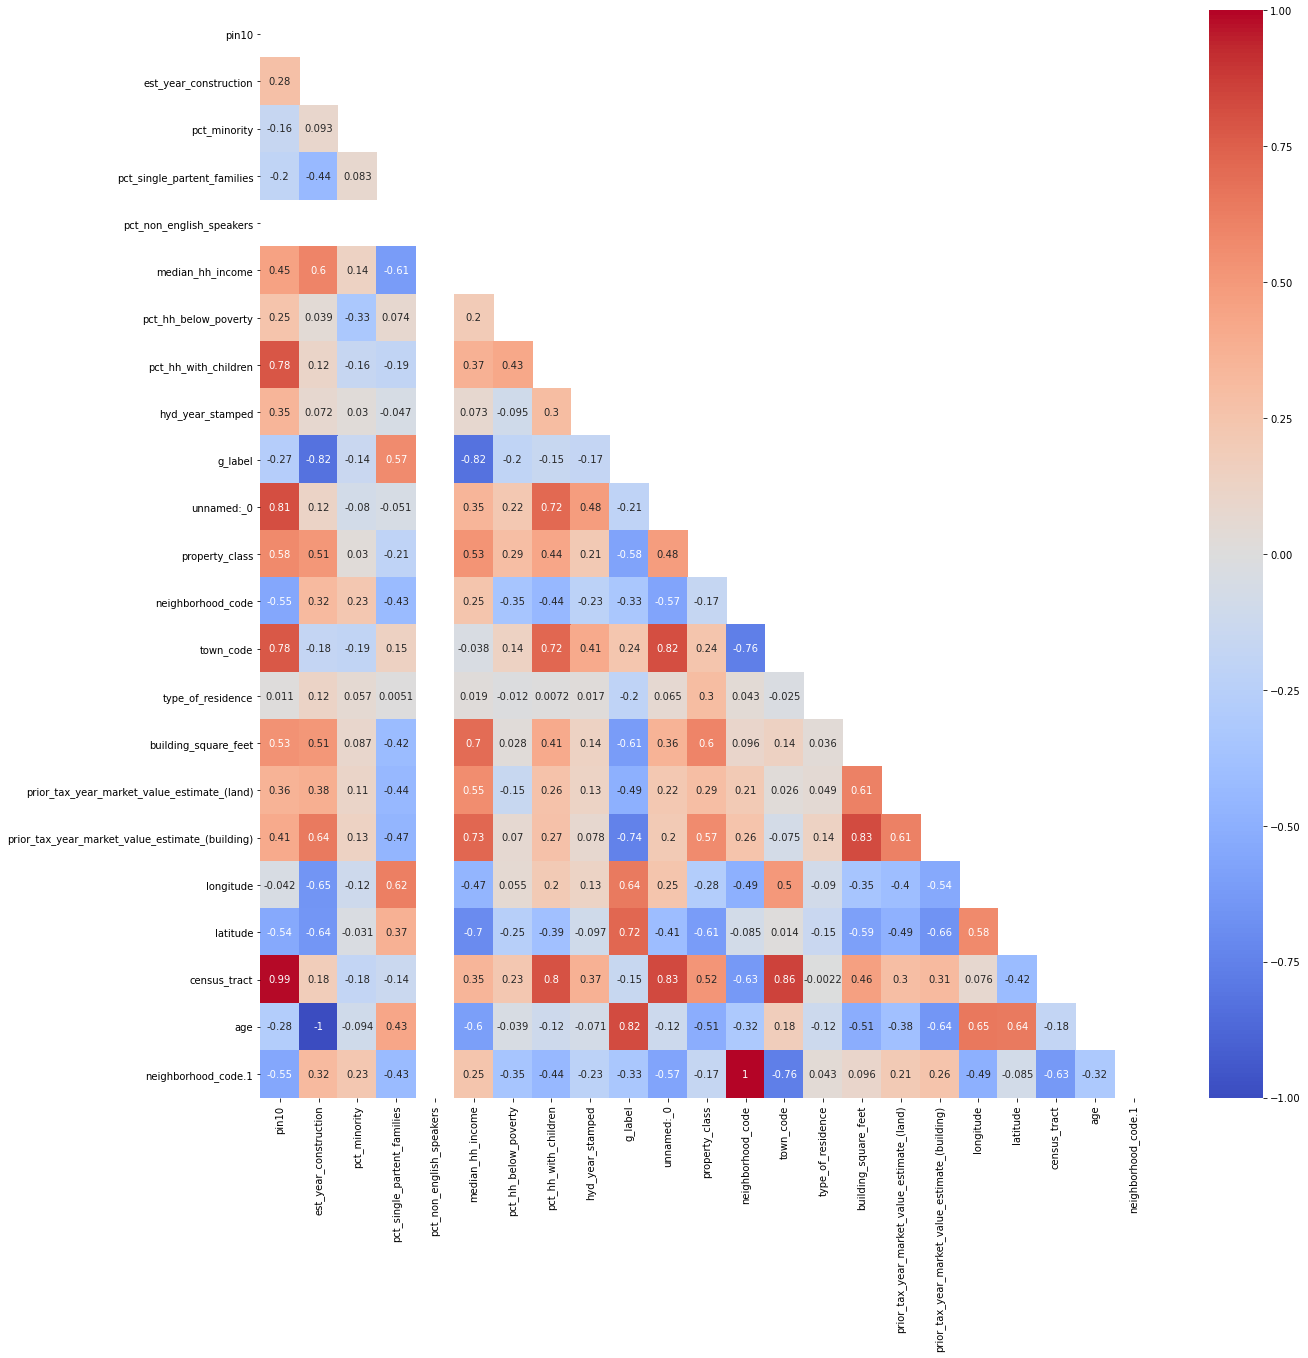

In [53]:
#  Investigating correlation among the variables

corr = haz_census.corr()
plt.figure(figsize=(20, 20))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, cmap='coolwarm', vmin=-1, vmax=1, annot=True, mask=mask);

Text(0, 0.5, 'Longitude')

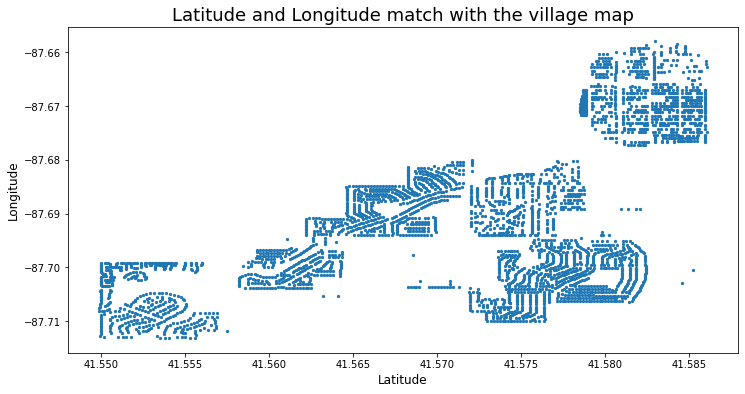

In [54]:
# Quick scatter plot for lat and long

plt.figure(figsize=(12,6))
plt.scatter(haz_census['latitude'], haz_census['longitude'], s=5);
plt.title('Latitude and Longitude match with the village map', fontsize=18)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Longitude", fontsize=12)

# 2.  K-Means Model
### In this section we will create clusters using latitude and longitude.  These values could replace latitude and longitude in the models

In [55]:
# Will use K-means to group the location.  
# Preparing the X matrix

X = haz_census[['latitude', 'longitude']]
X

,latitude,longitude
0,41.583383,-87.671160
1,41.580632,-87.673116
2,41.573429,-87.691318
3,41.583720,-87.666394
4,41.574146,-87.690178
...,...,...
3752,41.550419,-87.699936
3753,41.550260,-87.701150
3754,41.563262,-87.692461
3755,41.564081,-87.691572


In [56]:
# Scaling

ss = StandardScaler()
X_sc = ss.fit_transform(X)


2 sil 0.4907019353481576
3 sil 0.5492146097362158
4 sil 0.5790164785456148
5 sil 0.5455984468743741
6 sil 0.5354161466114731
7 sil 0.5004562717438376
8 sil 0.43886086354158654
9 sil 0.4384580247002066


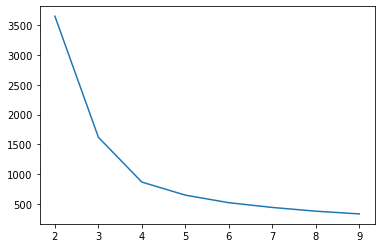

In [57]:
# Find the elbow to identify the right k value

ks = list(range(2, 10))
inertias = []
for k in ks:
    km = KMeans(n_clusters=k)
    km.fit(X_sc)
    print(k, 'sil', silhouette_score(X_sc, km.labels_))
    inertias.append(km.inertia_)
    
plt.plot(ks, inertias)

### Re-Instantiate and fit the model with k=4

In [58]:
# Instantiate

km = KMeans(n_clusters=4, random_state=42 )

# Fitting

km.fit(X_sc)

KMeans(n_clusters=4, random_state=42)

In [59]:
# Check out centroids

km.cluster_centers_

array([[-1.59960802, -0.89488671],
       [ 0.52426064, -0.7944181 ],
       [ 1.04274524,  1.56971644],
       [-0.13877253,  0.20606098]])

In [60]:
# Label the centroids
km.labels_

array([2, 2, 3, ..., 3, 3, 1])

In [61]:
# attach predicted cluster to original points

haz_census['cluster'] = km.labels_
haz_census.head()

,pin10,est_year_construction,pct_minority,pct_single_partent_families,pct_non_english_speakers,median_hh_income,pct_hh_below_poverty,pct_hh_with_children,resident_type,hyd_year_stamped,...,building_square_feet,prior_tax_year_market_value_estimate_(land),prior_tax_year_market_value_estimate_(building),longitude,latitude,census_tract,property_address,age,neighborhood_code.1,cluster
0,2930111009,1960,80.064309,57.913669,0,44107,20.967742,43.884892,two-story,2012,...,2063.0,13310.0,118330.0,-87.671160,41.583383,827700.0,16853 CRANE AVE,62,130,2
1,2930125045,1958,80.064309,57.913669,0,44107,20.967742,43.884892,1-plus-story,2012,...,768.0,15010.0,34560.0,-87.673116,41.580632,827700.0,2305 W 170TH ST,64,130,2
2,2825319003,1959,98.171846,49.226006,0,49239,17.184644,42.105263,split-level,1996,...,1411.0,21130.0,78440.0,-87.691318,41.573429,825503.0,3105 LONGFELLOW AVE,63,260,3
3,2930115006,1967,93.566176,65.337423,0,35789,7.720588,45.398773,two-story,1988,...,1823.0,12430.0,76210.0,-87.666394,41.583720,827700.0,16833 SHEA AVE,55,130,2
4,2825321029,1962,98.171846,49.226006,0,49239,17.184644,42.105263,one-story,1928,...,1602.0,35360.0,73160.0,-87.690178,41.574146,825503.0,3017 LONGFELLOW AVE,60,260,3


In [62]:
#  Making sure the number of cluster is the exact one
haz_census['cluster'].value_counts()

3    1086
1    1041
2     837
0     793
Name: cluster, dtype: int64

In [63]:
# Creating a dataset to plot clusters and centroids

long_lat_centr = haz_census[['latitude','longitude']]
pd.DataFrame(long_lat_centr)
long_lat_centr.head()

,latitude,longitude
0,41.583383,-87.671160
1,41.580632,-87.673116
2,41.573429,-87.691318
3,41.583720,-87.666394
4,41.574146,-87.690178


In [64]:
#labels = km.labels_
long_lat_centr['clusters'] = km.labels_
long_lat_centr.head()

<ipython-input-64-6a0032456b3d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long_lat_centr['clusters'] = km.labels_


,latitude,longitude,clusters
0,41.583383,-87.671160,2
1,41.580632,-87.673116,2
2,41.573429,-87.691318,3
3,41.583720,-87.666394,2
4,41.574146,-87.690178,3


In [65]:
long_lat_centr['clusters'].value_counts()

3    1086
1    1041
2     837
0     793
Name: clusters, dtype: int64

In [66]:
## Create a dataframe for cluster_centers (centroids)

centroids = pd.DataFrame(ss.inverse_transform(km.cluster_centers_),
columns=['latitude', 'longitude'])
centroids

,latitude,longitude
0,41.555953,-87.703377
1,41.577219,-87.701982
2,41.582411,-87.669166
3,41.570580,-87.688095


<ipython-input-67-da58ab655751>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long_lat_centr['color'] = long_lat_centr['clusters'].map(lambda p: colors[p])


<Figure size 504x504 with 0 Axes>

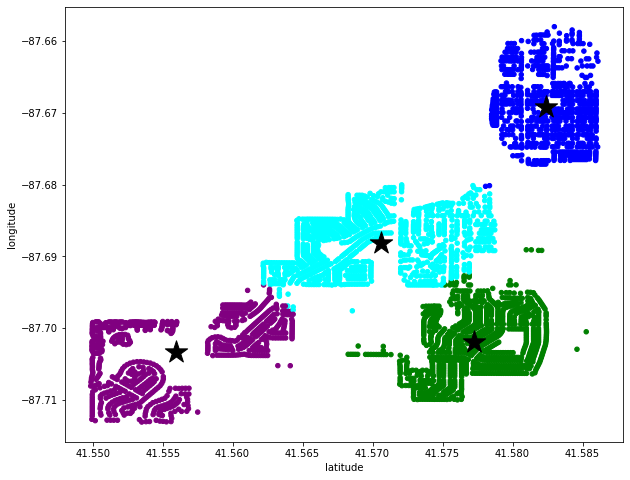

In [67]:
plt.figure(figsize=(7,7));

## Plot scatter by cluster / color, and centroids
colors = ["purple", "green", "blue", 'cyan']
long_lat_centr['color'] = long_lat_centr['clusters'].map(lambda p: colors[p])

ax = long_lat_centr.plot(    
    kind="scatter", 
    x="latitude", y="longitude",
    figsize=(10,8),
    c = long_lat_centr['color']
)

centroids.plot(
kind="scatter",
x="latitude", y="longitude",
marker="*", c='black', s=550,
ax=ax
);

In [68]:
print(f'Inertia: {km.inertia_}, Silhouette: {silhouette_score(X_sc, km.labels_)}')

Inertia: 866.4372379827428, Silhouette: 0.5790144693230326


### Exporting a dataset (census4.csv) that will be used for modeling.  This one contains the column with the cluster data.  It can be used in place of the dataset containing latitude and longitude data only

In [69]:
# Exporting as a new dataset

haz_census.to_csv('./Data/haz_census4.csv')